Problem 5 & 6 Chapter 4
------

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
np.random.seed = 18032020

# Problem 5

## Generate the numbers

### P(x)=1, -0.5≤x≤0.5
100 experiments, 10 samples each

In [4]:
s1 = np.array([np.average(np.random.uniform(low=-0.5,high=0.5,size=10)) for i in range(100)])

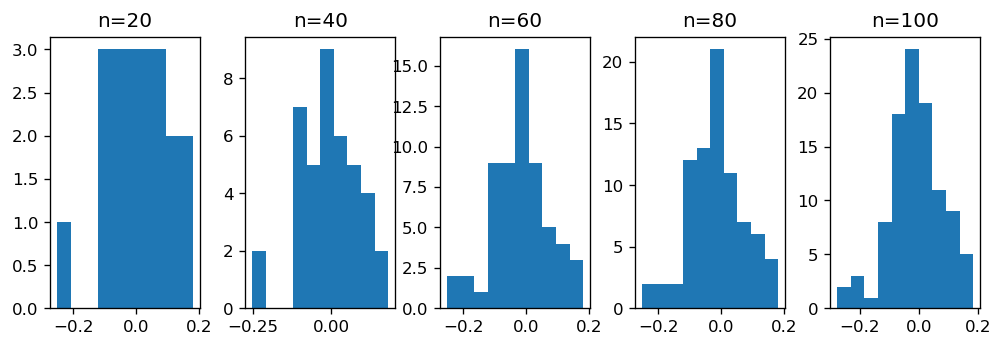

In [5]:
gs = plt.GridSpec(1, 5, figure = plt.figure(num = None, figsize = (10,3), dpi=120), wspace = 0.3, hspace = 0.4)

n=1
for g in gs:
    if n==6:
        break
    current_ax = plt.subplot(g)
    current_ax.hist(s1[:20*n])
    plt.title(f'n={20*n}')
    n += 1
    
plt.show()

### P(x) = 0.001 -500≤x≤500
100 experiments, 100 samples each

In [6]:
s2 = np.array([np.average(np.random.uniform(low=-500,high=500,size=10)) for i in range(100)])

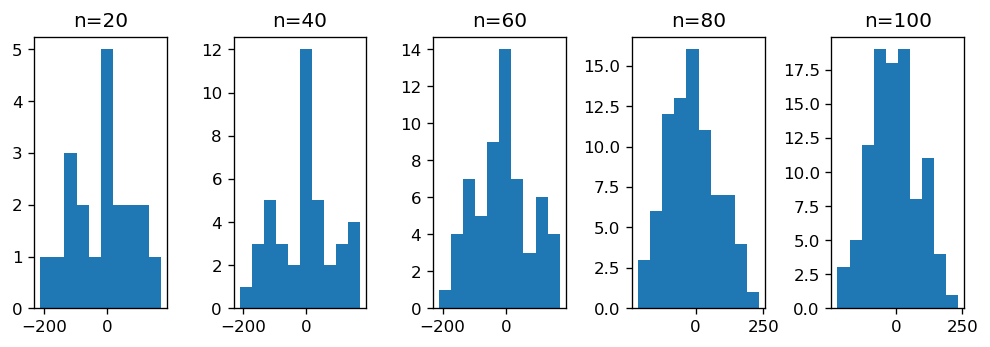

In [7]:
gs = plt.GridSpec(1, 5, figure = plt.figure(num = None, figsize = (10,3), dpi=120), wspace = 0.5, hspace = 0.4)

n=1
for g in gs:
    if n==6:
        break
    current_ax = plt.subplot(g)
    current_ax.hist(s2[:20*n])
    plt.title(f'n={20*n}')
    n += 1
    
plt.show()

### P(x) = a/x^2, 0.1 < x < inf

Normalization: a=0.1. 100 experiments, 100 samples each

In [8]:
x_exp = np.vectorize(lambda U: 0.1/(1-U))

In [9]:
s3 = np.array([np.average(x_exp(np.random.uniform(size=100))) for i in range(100)])

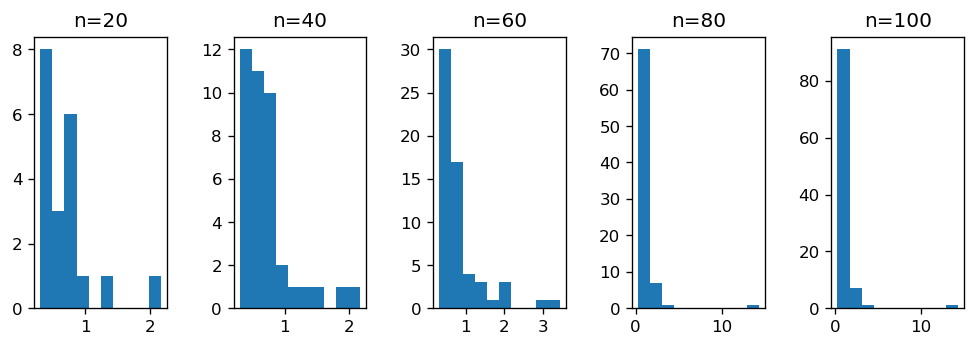

In [10]:
gs = plt.GridSpec(1, 5, figure = plt.figure(num = None, figsize = (10,3), dpi=120), wspace = 0.5, hspace = 0.4)

n=1
for g in gs:
    if n==6:
        break
    current_ax = plt.subplot(g)
    current_ax.hist(s3[:20*n])
    plt.title(f'n={20*n}')
    n += 1
    
plt.show()

# Problem 6 Chapter 4

## Item a)

In [117]:
samples = [10,100,1000]
means = [1,5,10]

In [120]:
s4 = np.array([[[np.average(np.random.exponential(scale=mu,size=s)) for i in range(100)] for s in samples]
               for mu in means])

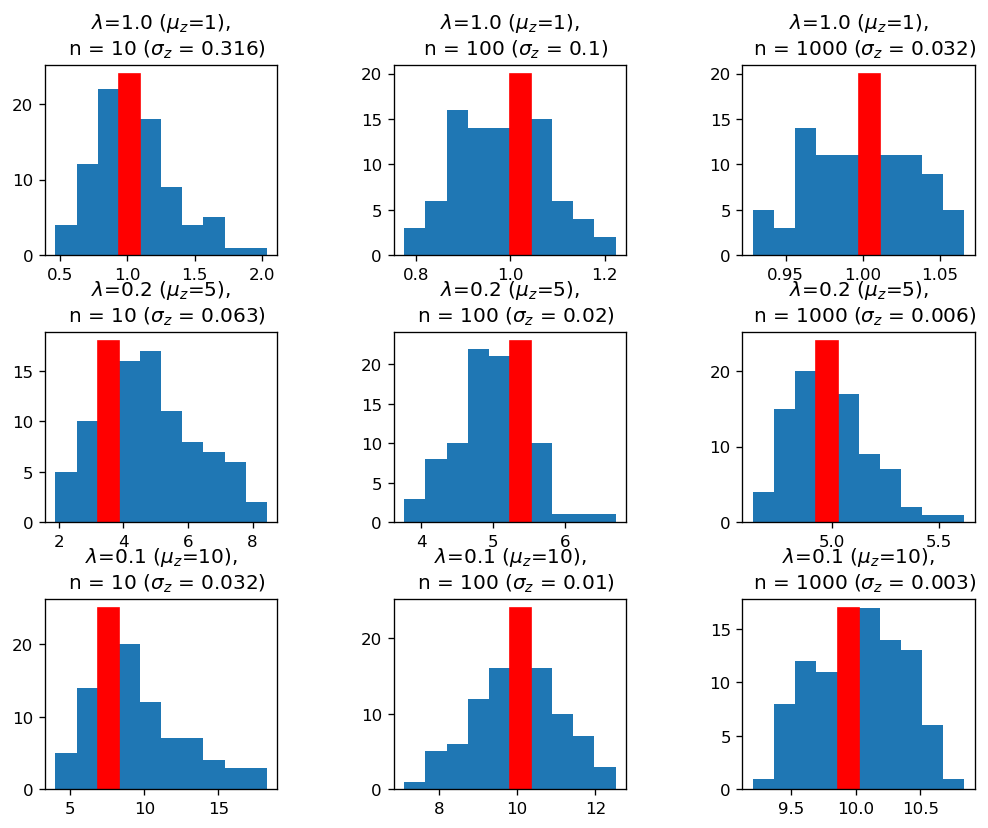

In [128]:
gs = plt.GridSpec(3, 3, figure = plt.figure(num = None, figsize = (10,8), dpi=120), wspace = 0.5, hspace = 0.4)

n=0
for g in gs:
    current_ax = plt.subplot(g)
    m, bins, patches = current_ax.hist(s4[n // 3, n%3])
    mode_left, mode_right = bins[np.where(m == m.max())[0][0]], bins[np.where(m == m.max())[0][0]+1]
    plt.axvspan(xmin=mode_left,xmax=mode_right, ymin=0, ymax=m.max()/plt.ylim()[1], color='red')
    plt.title(f'$\lambda$={1/means[n//3]} ($\mu_z$={means[n//3]}),\n  n = {samples[n%3]} ($\sigma_z$ = {np.round(1/(means[n//3]*samples[n%3]**(0.5)), 3)})')
    n += 1
    
plt.show()

## Item b)

In [4]:
from scipy.stats import cauchy

In [5]:
cauchy_dist = cauchy(loc=25, scale=3)

In [9]:
x_cauchy = np.linspace(cauchy_dist.ppf(0.01), cauchy_dist.ppf(0.99), 100)

In [10]:
s4 = [np.mean(cauchy_dist.rvs(size=100)) for i in range(100)]

Text(0.5, 1.0, 'Mean distribution of $n$ cauchy-sampled values \n $n = 100$, $x_0 = 25$, $\\gamma = 3$')

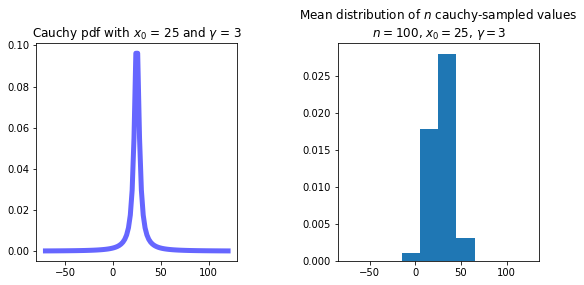

In [20]:
(g1, g2) = plt.GridSpec(1, 2, figure= plt.figure(None,(9,4)), wspace = 0.5)

ax1 = plt.subplot(g1)
ax1.plot(x_cauchy, cauchy_dist.pdf(x_cauchy), 'r-', lw=5, alpha=0.6, color='blue')
plt.title('Cauchy pdf with $x_0$ = 25 and $\gamma$ = 3')

ax2 = plt.subplot(g2)
n, bins, patches = ax2.hist(s4, range=[-75,125], density = True)
plt.title('Mean distribution of $n$ cauchy-sampled values \n $n = 100$, $x_0 = 25$, $\gamma = 3$')
